In [6]:

import warnings
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
warnings.simplefilter('ignore')

In [8]:
go_sales_connect = sqlite3.connect('go_sales.sqlite')


In [18]:
df = pd.read_sql_query("SELECT ORDER_DATE, PRODUCT_NUMBER, QUANTITY FROM order_header join order_details on order_details.ORDER_NUMBER = order_header.ORDER_NUMBER", go_sales_connect)
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE']).dt.to_period('M')
df = df.groupby(['PRODUCT_NUMBER', pd.Grouper(key='ORDER_DATE')])['QUANTITY'].sum().reset_index()
df['ORDER_DATE'] = df['ORDER_DATE'].dt.year * 100 + df['ORDER_DATE'].dt.month
df

,PRODUCT_NUMBER,ORDER_DATE,QUANTITY
0,1,202001,594
1,1,202002,344
2,1,202003,898
3,1,202004,1328
4,1,202005,640
...,...,...,...
3865,99,202208,264
3866,99,202209,256
3867,99,202210,242
3868,99,202211,148


In [19]:
X = df.drop('QUANTITY', axis=1)
y = df.loc[:, ['QUANTITY']]
y.head()

,QUANTITY
0,594
1,344
2,898
3,1328
4,640


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42
)

In [21]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [22]:
y_pred = reg_model.predict(X_test)
y_pred

array([[636.51530241],
       [651.07341177],
       [503.40156533],
       [524.81514231],
       [657.08220783],
       [650.83114665],
       [636.91824004],
       [537.71668457],
       [610.90715377],
       [562.71942169],
       [628.16745794],
       [602.92597344],
       [487.02872902],
       [497.99767824],
       [578.6490266 ],
       [590.46464738],
       [498.80405604],
       [487.79481306],
       [672.48698875],
       [588.32757032],
       [501.6674259 ],
       [560.46146334],
       [645.26608451],
       [568.48645517],
       [554.77501738],
       [604.09549764],
       [601.99519662],
       [667.48654183],
       [549.61339541],
       [624.17485764],
       [521.75030363],
       [568.32528012],
       [604.01139238],
       [516.5483879 ],
       [607.0359373 ],
       [541.99134121],
       [656.19473997],
       [623.44906736],
       [484.56879933],
       [628.00628289],
       [635.38607197],
       [631.79691184],
       [629.65933225],
       [538

In [25]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={0: 'Quantity prediction'})
prediction_df.head()

,Quantity prediction
0,636.515302
1,651.073412
2,503.401565
3,524.815142
4,657.082208


In [26]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['QUANTITY'], prediction_df], axis=1)
y_test_prediction_merge.loc[y_test_prediction_merge['QUANTITY'].notna(), :]
y_test_prediction_merge

,QUANTITY,Quantity prediction
0,282,636.515302
1,294,651.073412
2,586,503.401565
3,772,524.815142
4,350,657.082208
...,...,...
576,2142,553.484612
577,26,538.684740
578,2828,651.960377
579,246,636.111862


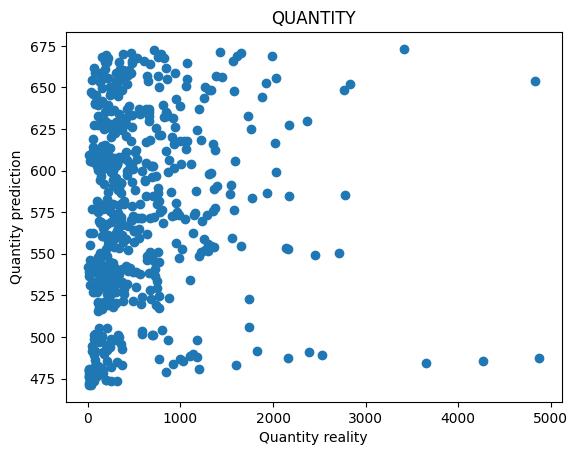

In [30]:
plt.scatter(y_test_prediction_merge['QUANTITY'], y_test_prediction_merge['Quantity prediction'])
plt.xlabel('Quantity reality')
plt.ylabel('Quantity prediction')
plt.title('QUANTITY')
plt.show()

In [27]:
mean_squared_error(y_test, y_pred)

385763.2886532018

In [28]:
mean_absolute_error(y_test, y_pred)

433.17878021933774